<a href="https://colab.research.google.com/github/slanucha/deep_learning_colab/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


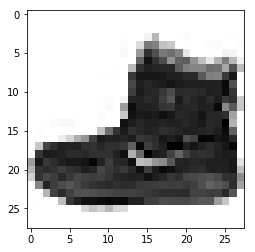

In [3]:
plt.imshow(x_train[0], cmap='gray_r')

In [0]:
x_train = x_train / 255
x_train = np.reshape(x_train, (-1, 28, 28, 1))
y_train = to_categorical(y_train, num_classes=10)

x_test = x_test / 255
x_test = np.reshape(x_test, (-1, 28, 28, 1))
y_test = to_categorical(y_test, num_classes=10)

in_shape = (28, 28, 1)
out_shape = 10

In [5]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=in_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=out_shape))
model.add(Activation('softmax'))

W0712 13:07:27.465776 140256075306880 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
r = model.fit(x_train, y_train, validation_split=0.33, epochs=15, batch_size=32)
print("Returned:", r)

Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 89s 2ms/sample - loss: 0.4984 - acc: 0.8197 - val_loss: 0.3848 - val_acc: 0.8594
Epoch 2/15
40199/40199 [==============================] - 88s 2ms/sample - loss: 0.3516 - acc: 0.8717 - val_loss: 0.4273 - val_acc: 0.8386
Epoch 3/15
40199/40199 [==============================] - 88s 2ms/sample - loss: 0.3044 - acc: 0.8871 - val_loss: 0.3144 - val_acc: 0.8867
Epoch 4/15
40199/40199 [==============================] - 88s 2ms/sample - loss: 0.2701 - acc: 0.9001 - val_loss: 0.3345 - val_acc: 0.8819
Epoch 5/15
40199/40199 [==============================] - 92s 2ms/sample - loss: 0.2428 - acc: 0.9111 - val_loss: 0.3124 - val_acc: 0.8895
Epoch 6/15
40199/40199 [==============================] - 92s 2ms/sample - loss: 0.2219 - acc: 0.9168 - val_loss: 0.3859 - val_acc: 0.8672
Epoch 7/15
40199/40199 [==============================] - 92s 2ms/sample - loss: 0.1963 - acc: 0.9242 - val_loss: 0.

In [8]:
print(r.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


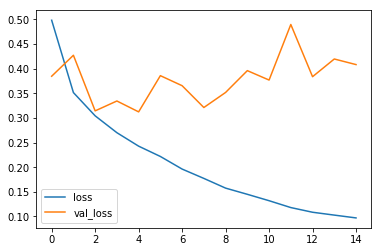

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

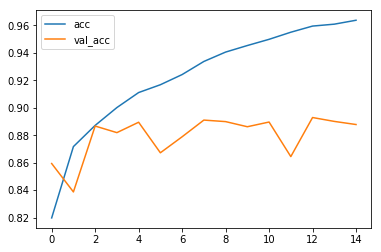

In [12]:
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()